# Load the basic Modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the titanic data.

In [3]:
data = pd.read_csv("Titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration

In [4]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


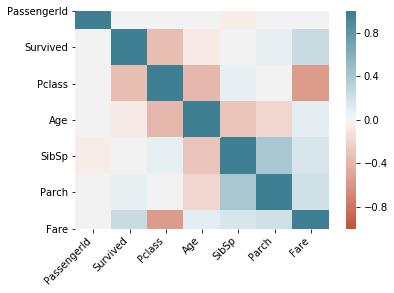

In [5]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [6]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.

## Remove the Features not in use

In [7]:
print(data.Cabin.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [8]:
data.drop(["Cabin","Name","PassengerId","Ticket"],axis = 1,inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Treating the missing values

In [9]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [10]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
data.iloc[:,3:4] = si.fit_transform(data.iloc[:,3:4])
si2 = SimpleImputer(strategy='most_frequent')
data.iloc[:,7:8] = si2.fit_transform(data.iloc[:,7:8])

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Checking the Outliers

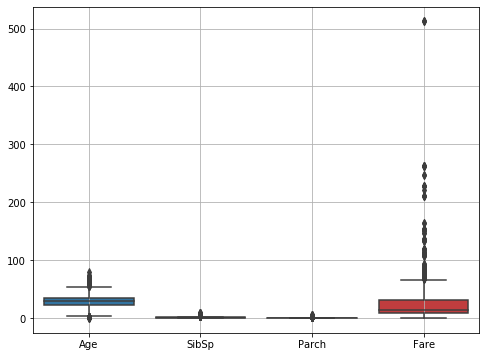

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data[['Age','SibSp','Parch','Fare']])
plt.grid()
plt.show()

# Feature Engineering

In [14]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [15]:
le = LabelEncoder()
data.iloc[:,2] = le.fit_transform(data.iloc[:,2])
data.iloc[:,7] = le.fit_transform(data.iloc[:,7])

In [16]:
X = data.drop("Survived",axis = 1).values
y = data["Survived"].values
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [6])],remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.int)

## Remove first element

In [18]:
X = X[:,1:]
X[:5]

array([[ 0,  1,  3,  1, 22,  1,  0,  7],
       [ 0,  0,  1,  0, 38,  1,  0, 71],
       [ 0,  1,  3,  0, 26,  0,  0,  7],
       [ 0,  1,  1,  0, 35,  1,  0, 53],
       [ 0,  1,  3,  1, 35,  0,  0,  8]])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Split data into training and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123,stratify=y)

# Normalize or Scale the Training data

In [21]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)

## Checking data on different Algorithm

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Appending the algorithm in list

In [23]:
model=[]
model.append(('LR',LogisticRegression()))
model.append(('LDA',LinearDiscriminantAnalysis()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('DTC',DecisionTreeClassifier()))
model.append(('GNB',GaussianNB()))
model.append(('SVC',SVC()))
model.append(('RF',RandomForestClassifier()))
model.append(('AB',AdaBoostClassifier()))

# Kfold crossvalidation on different model and check most accurate model

In [24]:
seed=6
scoring="accuracy"
for name,mod in model:
    kfold=KFold(n_splits=3,random_state=seed)
    cv_result=cross_val_score(mod,X_train,y_train,cv=kfold,scoring=scoring)
    print("Model: {}, Mean: {} and std: {}".format(name,cv_result.mean(),cv_result.std()))

Model: LR, Mean: 0.7962864470682788 and std: 0.031195427792590845
Model: LDA, Mean: 0.7864529778155989 and std: 0.03234308014252634
Model: KNN, Mean: 0.8047252656336795 and std: 0.026612927002182544
Model: DTC, Mean: 0.7879126334077936 and std: 0.011228160373559214
Model: GNB, Mean: 0.7766372371733503 and std: 0.031860409331502096
Model: SVC, Mean: 0.8243685659917975 and std: 0.03707469514439516
Model: RF, Mean: 0.8047252656336797 and std: 0.025705487956925854
Model: AB, Mean: 0.8019241451855003 and std: 0.022900649979751216


# We choose Random Forest due to it's high accuracy to given data

# Now make a ML Pipeline to train and fit the data

In [25]:
X[:5]

array([[ 0,  1,  3,  1, 22,  1,  0,  7],
       [ 0,  0,  1,  0, 38,  1,  0, 71],
       [ 0,  1,  3,  0, 26,  0,  0,  7],
       [ 0,  1,  1,  0, 35,  1,  0, 53],
       [ 0,  1,  3,  1, 35,  0,  0,  8]])

# Declare data preprocessing steps

In [26]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=100))

# Declare hyperparameters to tune

In [27]:
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestclassifier__max_depth': [None, 5, 3, 1]}

# Tune model using cross-validation pipeline

In [28]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [29]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decr

## Refit on the entire training set, no additional code needed if clf.refit == True (default is True) Evaluate model pipeline on test data
## Prediction

In [30]:
pred = clf.predict(X_test)

# Confusion Matrix

In [31]:
confusion_matrix(y_test,pred)

array([[101,   9],
       [ 23,  46]], dtype=int64)

# Save model for future use

In [32]:
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

# To load: clf2 = joblib.load('rf_regressor.pkl')

In [33]:
clf2 = joblib.load('rf_regressor.pkl')

In [34]:
pred = clf2.predict(X_test[0].reshape(1,-1))
pred

array([0], dtype=int64)

In [35]:
y_test[0]

0

In [37]:
kfold=KFold(n_splits=3,random_state=seed)
cv_result=cross_val_score(clf,X_train,y_train,cv=kfold,scoring=scoring)
print("Model: {}, Mean: {} and std: {}".format("RF",cv_result.mean(),cv_result.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model: RF, Mean: 0.8173303076504864 and std: 0.04331627032720314


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
